In [159]:
import requests
import json
import polyline
import ast
import matplotlib.pyplot as plt
import contextily as ctx
import geopandas as gpd
from shapely.geometry import LineString


In [132]:
# test api example - GET

url = "https://graphhopper.com/api/1/route"

query = {
  "profile": "car",
  "point": [
    [
      20.95997,
      105.76113
    ],
    [
      21.00776,
      105.8343
    ]
  ], # lat, long format
  "points_encoded": True,
  "optimize": "false",
  "instructions": "true",
  "calc_points": "true",
  "debug": "false",
  "key": "669ddb50-80a8-4bc3-94ed-6371ca6dc8c7"
}

response = requests.get(url, params=query)

data = response.json()
print(data)

{'message': "query param point is invalid: Cannot parse point '105.76113'"}


yv|~BanodS?@x@u@bAqAjDoDkGmJlOgMpDiDcDoEa@s@wAkBiA}A_DgEm@w@ASIOUGyBsC}D?_INqEwGa@g@k@Ka@k@kDiFgBiC_@g@_H{Jm@w@a@m@sBuCaBwBmEsG_Ay@uDoCOMgBmAsAaAU]mA}ByF_Jw@_BeAiBq@oAmAiCg@kAgBuEE_@CK@E?KAGEEECoDaGYe@UEsBiDW_@tAgADOEOy@}AmAwLjBuBeEeGkA~@k@iG[}CSqBe@e@a@cAo@c@_Am@GIi@gB{@Ty@EyAMa@LmBR_AFyA@UAmAAUHMTgDsBoAu@ICC@uAbAyAaCc@u@pAcAe@u@cC_EcAiBAm@`Ak@yCeFdCcBu@oA~AgAg@cAAYRkDHoCPcCVoFEqAO}DE{AM_AWqAc@aB[L[cAHCEQu@wFmAP_AF}@?_BHMAGB}BAASgAONO@k@O_@C{AK}Ac@uC{AZUBeAPoBV{CPqAB}BDkCKmAGg@IwDq@oCe@{Be@kCw@oA]oB_@a@Gh@yEBs@s@Qk@a@}@u@wBaBsByAGOAM?y@NaAbAuFJi@Hg@jAmGP]n@w@n@_@rAo@^YW_@MOSa@AOFc@j@{AkDgAuAm@s@U}DcAl@cCk@OOCc@QuAa@qBs@qEqAiE_AhAiJy@MuE[oBWKRUT?QMiA?]]C_@HEc@CMGKg@q@^g@BI?MAIGO{@iAoB_CuAnADFWV
[(20.95997, 105.76113), (20.95997, 105.76112), (20.95968, 105.76139), (20.95934, 105.7618), (20.95848, 105.76268), (20.95982, 105.76451), (20.95719, 105.76679), (20.9563, 105.76764), (20.95712, 105.76868), (20.95729, 105.76894), (20.95773, 105.76948), (20.9581, 105.76995), (20.9589, 105.77095), 

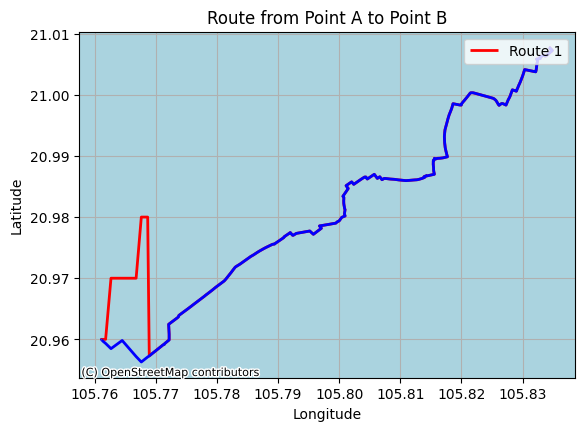

In [178]:
# test api example - POST

def Convert(a):
  it = iter(a)
  res_dct = dict(zip(it, it))
  return res_dct

url = "https://graphhopper.com/api/1/route"

query = {
  "key": "669ddb50-80a8-4bc3-94ed-6371ca6dc8c7"
}

payload = {
  "profile": "bike",
  "points": [
    [
      105.76113,
      20.95997
    ],
    [
      105.8343,
      21.00776
    ]
  ], # long, lat format
  "points_encoded": True, # False returns a non encoded string of coordinates
  "point_hints": [
    "Lindenschmitstraße",
    "Thalkirchener Str."
  ],
  "snap_preventions": [
    "motorway",
    "ferry",
    "tunnel"
  ],
  "details": [
    "road_class",
    "surface"
  ]
}

headers = {"Content-Type": "application/json"}

response = requests.post(url, json=payload, headers=headers, params=query)

data = response.json()
# print(json.dumps(data,indent=4)) # Display the JSON result returned by the API
# print(data['paths'])
# print(type(data))
test = json.dumps(data['paths'],indent=4)
# print(type(test))
s = json.loads(test)
for i in s:
  # print(json.dumps(i,indent=4))
  print(i['points'])
  print(polyline.decode(i['points']))
  
  coords = polyline.decode(i['points'])
  coords_test = [(20.95997, 105.76113), (20.96, 105.76112), (20.96, 105.76139), (20.96, 105.7618), (20.97, 105.76268), (20.97, 105.76451), (20.97, 105.76679), (20.98, 105.76764), (20.98, 105.76868), (20.95729, 105.76894), (20.95773, 105.76948), (20.9581, 105.76995), (20.9589, 105.77095), (20.95913, 105.77123), (20.95914, 105.77133), (20.95919, 105.77141), (20.9593, 105.77145), (20.95991, 105.77219), (20.96086, 105.77219), (20.96246, 105.77211), (20.96351, 105.77351), (20.96368, 105.77371), (20.9639, 105.77377), (20.96407, 105.77399), (20.96493, 105.77516), (20.96545, 105.77585), (20.96561, 105.77605), (20.96705, 105.77795), (20.96728, 105.77823), (20.96745, 105.77846), (20.96803, 105.77921), (20.96852, 105.77981), (20.96955, 105.78119), (20.96987, 105.78148), (20.97078, 105.7822), (20.97086, 105.78227), (20.97138, 105.78266), (20.9718, 105.78299), (20.97191, 105.78314), (20.9723, 105.78377), (20.97355, 105.78553), (20.97383, 105.78601), (20.97418, 105.78654), (20.97443, 105.78694), (20.97482, 105.78763), (20.97502, 105.78801), (20.97554, 105.78908), (20.97557, 105.78924), (20.97559, 105.7893), (20.97558, 105.78933), (20.97558, 105.78939), (20.97559, 105.78943), (20.97562, 105.78946), (20.97565, 105.78948), (20.97653, 105.79077), (20.97666, 105.79096), (20.97677, 105.79099), (20.97735, 105.79184), (20.97747, 105.792), (20.97704, 105.79236), (20.97701, 105.79244), (20.97704, 105.79252), (20.97733, 105.79299), (20.97772, 105.79519), (20.97718, 105.79578), (20.97817, 105.79709), (20.97855, 105.79677), (20.97877, 105.7981), (20.97891, 105.79889), (20.97901, 105.79946), (20.9792, 105.79965), (20.97937, 105.79999), (20.97961, 105.80017), (20.97993, 105.8004), (20.97997, 105.80045), (20.98018, 105.80097), (20.98048, 105.80086), (20.98077, 105.80089), (20.98122, 105.80096), (20.98139, 105.80089), (20.98194, 105.80079), (20.98226, 105.80075), (20.98271, 105.80074), (20.98282, 105.80075), (20.98321, 105.80076), (20.98332, 105.80071), (20.98339, 105.8006), (20.98423, 105.80118), (20.98463, 105.80145), (20.98468, 105.80147), (20.9847, 105.80146), (20.98513, 105.80112), (20.98558, 105.80177), (20.98576, 105.80204), (20.98535, 105.80238), (20.98554, 105.80265), (20.9862, 105.80361), (20.98654, 105.80414), (20.98655, 105.80437), (20.98622, 105.80459), (20.98699, 105.80574), (20.98632, 105.80624), (20.98659, 105.80664), (20.98611, 105.807), (20.98631, 105.80734), (20.98632, 105.80747), (20.98622, 105.80833), (20.98617, 105.80905), (20.98608, 105.80971), (20.98596, 105.81091), (20.98599, 105.81132), (20.98607, 105.81227), (20.9861, 105.81273), (20.98617, 105.81305), (20.98629, 105.81346), (20.98647, 105.81395), (20.98661, 105.81388), (20.98675, 105.81422), (20.9867, 105.81424), (20.98673, 105.81433), (20.987, 105.81557), (20.98739, 105.81548), (20.98771, 105.81544), (20.98802, 105.81544), (20.9885, 105.81539), (20.98857, 105.8154), (20.98861, 105.81538), (20.98924, 105.81539), (20.98925, 105.81549), (20.98961, 105.81557), (20.98953, 105.81565), (20.98952, 105.81587), (20.9896, 105.81603), (20.98962, 105.81649), (20.98968, 105.81696), (20.98986, 105.81771), (20.99032, 105.81757), (20.99043, 105.81755), (20.99078, 105.81746), (20.99134, 105.81734), (20.99212, 105.81725), (20.99253, 105.81723), (20.99316, 105.8172), (20.99386, 105.81726), (20.99425, 105.8173), (20.99445, 105.81735), (20.99537, 105.8176), (20.99609, 105.81779), (20.99671, 105.81798), (20.99741, 105.81826), (20.99781, 105.81841), (20.99837, 105.81857), (20.99854, 105.81861), (20.99833, 105.8197), (20.99831, 105.81996), (20.99857, 105.82005), (20.99879, 105.82022), (20.9991, 105.82049), (20.9997, 105.82098), (21.00028, 105.82143), (21.00032, 105.82151), (21.00033, 105.82158), (21.00033, 105.82187), (21.00025, 105.8222), (20.99991, 105.82343), (20.99985, 105.82364), (20.9998, 105.82384), (20.99942, 105.82519), (20.99933, 105.82534), (20.99909, 105.82562), (20.99885, 105.82578), (20.99843, 105.82602), (20.99827, 105.82615), (20.99839, 105.82631), (20.99846, 105.82639), (20.99856, 105.82656), (20.99857, 105.82664), (20.99853, 105.82682), (20.99831, 105.82728), (20.99917, 105.82764), (20.9996, 105.82787), (20.99986, 105.82798), (21.00081, 105.82832), (21.00058, 105.82898), (21.0008, 105.82906), (21.00088, 105.82908), (21.00106, 105.82917), (21.00149, 105.82934), (21.00206, 105.8296), (21.00311, 105.83001), (21.00412, 105.83033), (21.00375, 105.83214), (21.00404, 105.83221), (21.00511, 105.83235), (21.00567, 105.83247), (21.00573, 105.83237), (21.00584, 105.83226), (21.00584, 105.83235), (21.00591, 105.83272), (21.00591, 105.83287), (21.00606, 105.83289), (21.00622, 105.83284), (21.00625, 105.83302), (21.00627, 105.83309), (21.00631, 105.83315), (21.00651, 105.8334), (21.00635, 105.8336), (21.00633, 105.83365), (21.00633, 105.83372), (21.00634, 105.83377), (21.00638, 105.83385), (21.00668, 105.83422), (21.00724, 105.83486), (21.00767, 105.83446), (21.00764, 105.83442), (21.00776, 105.8343)]
  
  all_coords = coords + coords_test
  min_lon = min(coord[0] for coord in all_coords)
  max_lon = max(coord[0] for coord in all_coords)
  min_lat = min(coord[1] for coord in all_coords)
  max_lat = max(coord[1] for coord in all_coords)
  ax.set_xlim(min_lon - 0.01, max_lon + 0.01)
  ax.set_ylim(min_lat - 0.01, max_lat + 0.01)
  
  
  
  line = LineString([(lon, lat) for lat, lon in coords])
  line_test = LineString([(lon, lat) for lat, lon in coords_test])
  gdf = gpd.GeoDataFrame(index=[0,1], crs="EPSG:4326", geometry=[line_test,line])
  print(gdf)
  
  fig, ax = plt.subplots()
  gdf.plot(ax=ax, color=['red', 'blue'], linewidth=2)

  # Set a fixed aspect ratio
  ax.set_aspect('equal')

  # Customize and show the plot
  plt.title('Route from Point A to Point B')
  plt.xlabel('Longitude')
  plt.ylabel('Latitude')
  ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=5)
  plt.grid(True)
  plt.legend(['Route 1', 'Route 2'])
  plt.show()
  
  
  
  # line = LineString([(lon, lat) for lat, lon in coords])
  # gdf = gpd.GeoDataFrame(index=[0], crs="EPSG:4326", geometry=[line])
  # print(gdf)
  
  # fig, ax = plt.subplots()
  # gdf.plot(ax=ax, linewidth=2)

  # # Set a fixed aspect ratio
  # ax.set_aspect('equal')

  # # Customize and show the plot
  # plt.title('Route from Point A to Point B')
  # plt.xlabel('Longitude')
  # plt.ylabel('Latitude')
  # ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik, zoom=15)
  # plt.grid(True)
  # plt.show()
